In [12]:
#importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [13]:
#Loading the dataset
car_data=pd.read_csv('cleaned_car_data.csv');
car_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3845,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3846,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3847,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3848,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


Text(0.5, 1.0, 'Year vs Price')

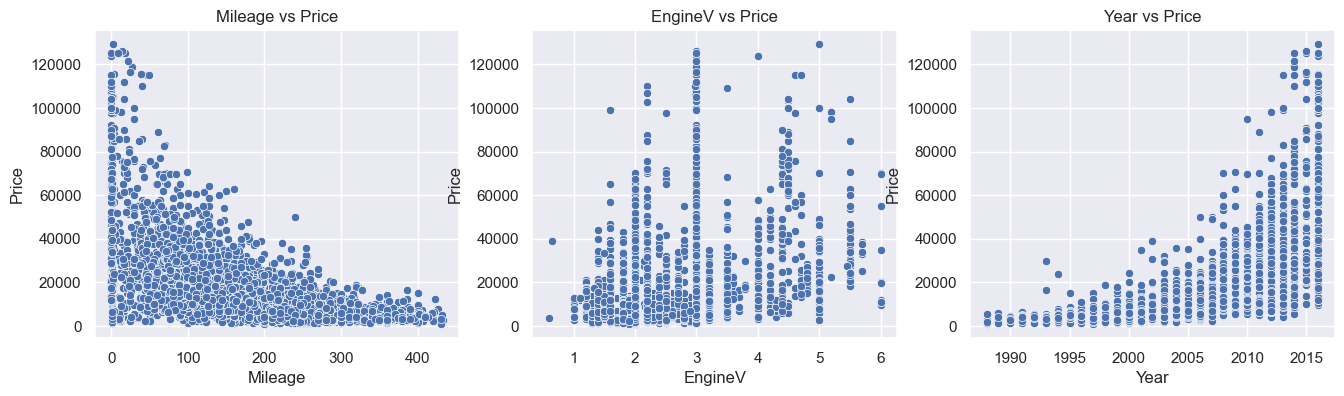

In [14]:
#plotting all the 3 numerical columns
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.scatterplot(x=car_data['Mileage'],y=car_data['Price'])
plt.title('Mileage vs Price')

plt.subplot(1,3,2)
sns.scatterplot(x=car_data['EngineV'],y=car_data['Price'])
plt.title('EngineV vs Price')

plt.subplot(1,3,3)
sns.scatterplot(x=car_data['Year'],y=car_data['Price'])
plt.title('Year vs Price')

Text(0.5, 1.0, 'Car Price Distribution')

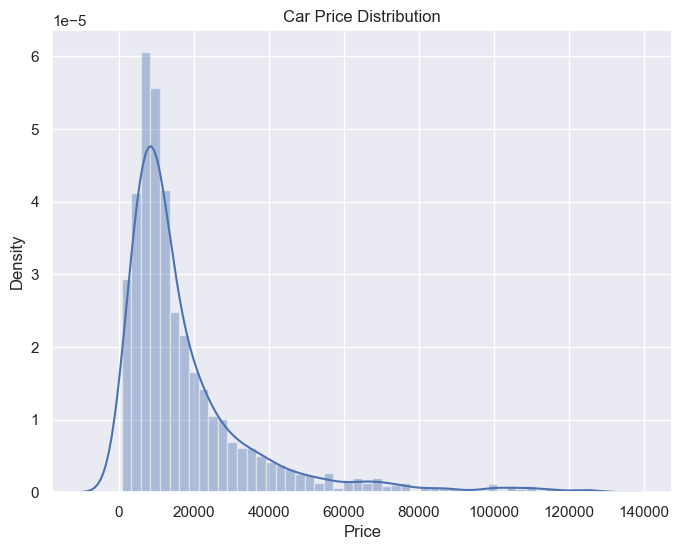

In [15]:
#checking the price
plt.figure(figsize=(8,6))
sns.distplot(car_data['Price'])
plt.title("Car Price Distribution")

In [16]:
#transformation of price using np.log()
log_price=np.log(car_data['Price'])

#adding column 'LogPrice' to car_data dataset
car_data['LogPrice']=log_price

#checking for updatation
car_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,LogPrice
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3845,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3846,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3847,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3848,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Text(0.5, 1.0, 'Year vs LogPrice')

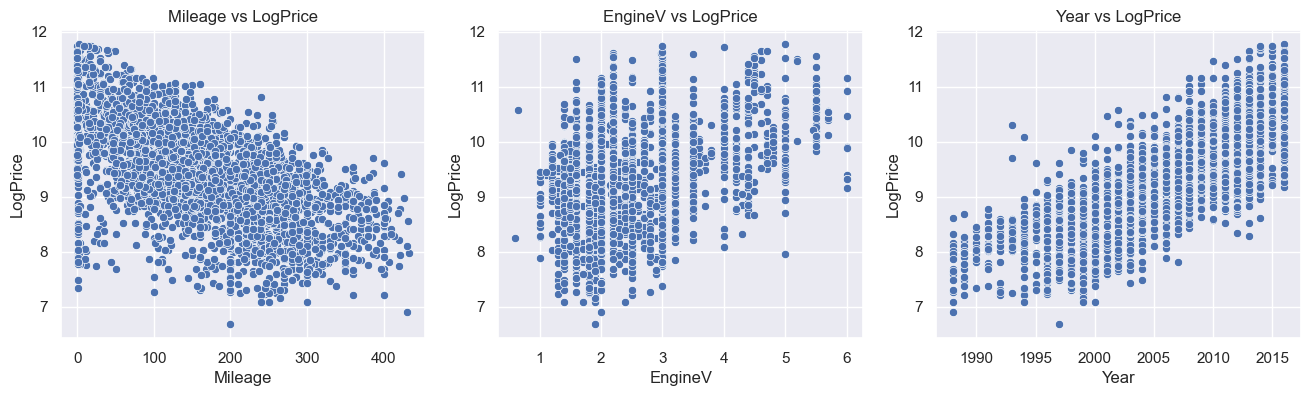

In [17]:
#plotting all the 3 numerical columns with LogPrice again
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.scatterplot(x=car_data['Mileage'],y=car_data['LogPrice'])
plt.title('Mileage vs LogPrice')

plt.subplot(1,3,2)
sns.scatterplot(x=car_data['EngineV'],y=car_data['LogPrice'])
plt.title('EngineV vs LogPrice')

plt.subplot(1,3,3)
sns.scatterplot(x=car_data['Year'],y=car_data['LogPrice'])
plt.title('Year vs LogPrice')

In [89]:
#dropping Price column of car_data which is no longer required
car_data.drop('Price',axis=1,inplace=True,errors='ignore')


#checking for updatation
car_data

,Brand,Body,Mileage,EngineV,Engine Type,Registration,LogPrice
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3845,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3846,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3847,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3848,BMW,sedan,1,3.5,Petrol,yes,8.779557


In [78]:
car_data.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'LogPrice'],
      dtype='object')

In [18]:
#importing VIF from statsmodels to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

#creating a DataFrame with 3 numerical columns - Mileage, EngineV & Year
df=car_data[['Mileage','EngineV','Year']]

#creating another DataFrame
vif_df=pd.DataFrame()

#Adding Columns
vif_df['VIF']=[vif(df.values,i) for i in range(df.shape[1])]
vif_df['Features']=df.columns

#checking for updation
vif_df

,VIF,Features
0,3.803519,Mileage
1,8.024762,EngineV
2,10.613154,Year


In [19]:
#dropping the year since it is much correlated with other columns
car_data.drop('Year',axis=1,inplace=True,errors='ignore')

#checking for updation
car_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,LogPrice
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...,...
3845,Volkswagen,11500.0,van,163,2.5,Diesel,yes,9.350102
3846,Toyota,17900.0,sedan,35,1.6,Petrol,yes,9.792556
3847,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,11.736069
3848,BMW,6500.0,sedan,1,3.5,Petrol,yes,8.779557


In [20]:
#Now Taking care of categorical columns - Brand,Body,Engine Type & Registrations

#checking datatypes
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3850 non-null   object 
 1   Price         3850 non-null   float64
 2   Body          3850 non-null   object 
 3   Mileage       3850 non-null   int64  
 4   EngineV       3850 non-null   float64
 5   Engine Type   3850 non-null   object 
 6   Registration  3850 non-null   object 
 7   LogPrice      3850 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 240.8+ KB


In [21]:
car_dummy_data=pd.get_dummies(car_data,drop_first=True)
car_dummy_data

,Price,Mileage,EngineV,LogPrice,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,11500.0,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3846,17900.0,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3847,125000.0,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3848,6500.0,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [95]:
#checking the multicollinearity again for all te new generated columns

#Creating a DataFrame
vif_df_all=pd.DataFrame()

#Adding Columns
vif_df_all['VIF']=[vif(car_dummy_data.values,i) for i in range(car_dummy_data.shape[1])]
vif_df_all['Features']=car_dummy_data.columns

#Checking the Results
vif_df_all

,VIF,Features
0,4.535312,Mileage
1,14.245444,EngineV
2,42.791998,LogPrice
3,2.620815,Brand_BMW
4,3.060872,Brand_Mercedes-Benz
5,1.834627,Brand_Mitsubishi
6,2.290541,Brand_Renault
7,2.419390,Brand_Toyota
8,3.328322,Brand_Volkswagen
9,1.594296,Body_hatch


In [96]:
car_dummy_data.columns

Index(['Mileage', 'EngineV', 'LogPrice', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [26]:
#creating a new arranged column for slicing
col=['LogPrice','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']
#creating a new DataFrame
preprocessed_car_data=car_dummy_data[col]
preprocessed_car_data

,LogPrice,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3846,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3847,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3848,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [27]:
#Saving the preprocessed_car_data in csv format for model creation
preprocessed_car_data.to_csv('preprocessed_car_data1.csv')
print('Save Successful')

Save Successful
